<a href="https://colab.research.google.com/github/arbarvar/Colab_python_test/blob/main/HO1_Linear_Regression_ML2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://arch.ut.ac.ir/documents/70819125/2017cca1-b036-41de-bcce-f7376699275b' alt="UT logo" width="120" height="120" align="left">

<img src="https://lh3.googleusercontent.com/proxy/cSLk1ChQGIw3uNJlU7VF59LE_K96IrIirIoS9I-G3ZdNPW5Z-F7CohJvyI2YYQksMgFCykIAtTPPFPCrzFqC5ZnVPf-PDrblSvONUoL1WPz0yZzwbpCPBpiZAGYxDG6zO_nf" width="120" height="120" align="right">

<h1 align=center><font size=5> <b><i>Machine Learning(Fall 2020)</b><br>Hands-On 1</i></font></h1>

# Setup

First, let's import few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Linear regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)

$$
\hat{y} = \theta_1 x_1 + ... + \theta_n x_n + \theta_0
$$

* $\hat{y}$ is the predicted value
* $x_i$ is the ith feature value
* $\theta_j$ is the jth model parameter 
* $x_0 = 1$ is constant
* $n$ is the number of features

Okay, that’s the Linear Regression model, so now how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model performs(in this case predicts).

The most common performance measure of a regression model is the Mean Square Error (MSE)
$$
MSE(\chi, \theta) = \frac{1}{2m}\sum_{i=1}^{m} (\hat{y}^{i} - y^{i})^2
$$
$$
MSE(\chi, \theta) = \frac{1}{2m}\sum_{i=1}^{m} (\theta^{T}x^{i} - y^{i})^2
$$
* $\chi = \{ x^{q}, y^{q}\}_{q=1}^{m}$
* $m$ is the number of data points

# The Normal Equation
To find the value of θ that minimizes the cost function, there is a closed-form solution —in other words, a mathematical equation that gives the result directly. This is called the Normal Equation 

$$
\hat{\theta} = (X^T X)^{-1} X^T Y
$$

* $\hat{\theta}$ is the model parametes $\theta_0 , \theta_1, ... , \theta_n $
* $Y_i$ is the ith target value among m targets
* $X = \begin{bmatrix}
{x^{(1)}}^{T}\\
...\\
{x^{(m)}}^{T}\\
\end{bmatrix}$

Visit
<a href="https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/">here</a>
for detailed deriviation of Normal equation.

# Linear regression using the Normal Equation

Firts we create some random line-shaped data

In [8]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

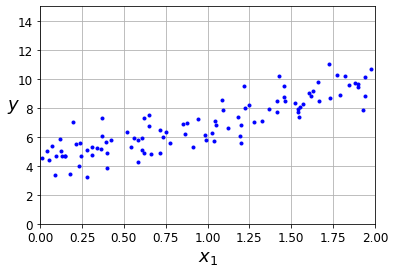

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.grid()

compute $\hat{\theta}$ using Normal equation

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

Visualize model predictions

In [ ]:
X_new = np.linspace(0, 2, 100).reshape(100, 1) # 100 linearly seperated points
X_new_b = np.c_[np.ones((100, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

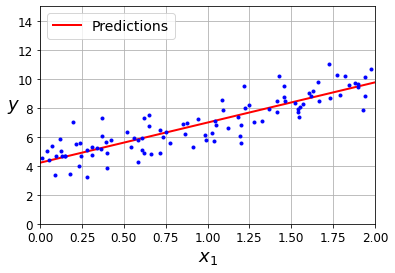

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid()

## Time complexity

Effect of high dimensionality on training time span

In [3]:
import time
NUM_DataPoints = 1000
Dims = [i for i in range(2,2000,200)]
times = []
for Dim in Dims:
    X_temp = np.random.randn(NUM_DataPoints,Dim)
    y_temp = np.random.randn(NUM_DataPoints, 1)
    strt_time = time.time()
    theta_best = np.linalg.inv(X_temp.T.dot(X_temp)).dot(X_temp.T).dot(y_temp)
    end_time = time.time()
    times.append(end_time-strt_time)

Text(0, 0.5, 'time')

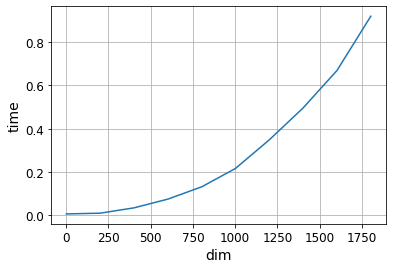

In [4]:
plt.plot(Dims, times)
plt.grid()
plt.xlabel('dim')
plt.ylabel('time')

Effect of massive data points on training time span

In [5]:
import time
np.random.seed(1234)
NUM_DataPoints = [i for i in range(1, 1000000, 5000)]
Dim = 10
times = []
for NUM_DataPoint in NUM_DataPoints:
    X_temp = np.random.randn(NUM_DataPoint,Dim)
    y_temp = np.random.randn(NUM_DataPoint, 1)
    strt_time = time.time()
    theta_best = np.linalg.inv(X_temp.T.dot(X_temp)).dot(X_temp.T).dot(y_temp)
    end_time = time.time()
    times.append(end_time-strt_time)

Text(0, 0.5, 'Time')

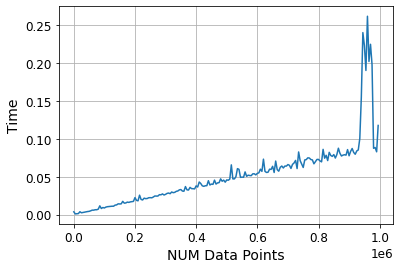

In [6]:
plt.plot(NUM_DataPoints, times)
plt.grid()
plt.xlabel('NUM Data Points')
plt.ylabel('Time')

## sklearn linear regressor

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.63175691]), array([[3.16339591]]))

Such challenges proposed by closed-form approach, force us to consider numericall methods as well.

# Gradient Descent
Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.
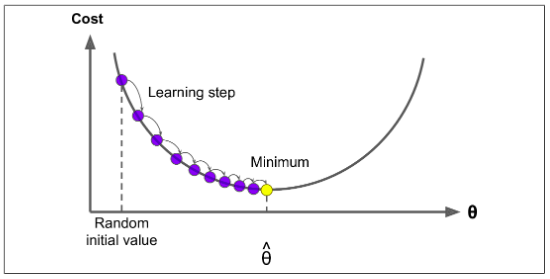
<center>
<img src="images/lecII/gd.png" alt="gd image">
</center>

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

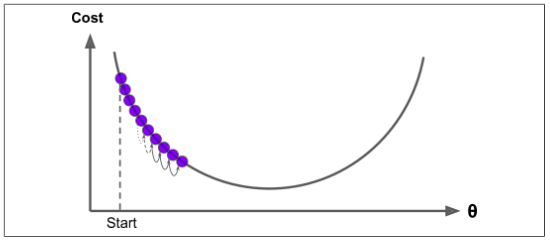
<center>
<img src="images/lecII/gd_small.png" alt="gd image small step">
</center>

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution 
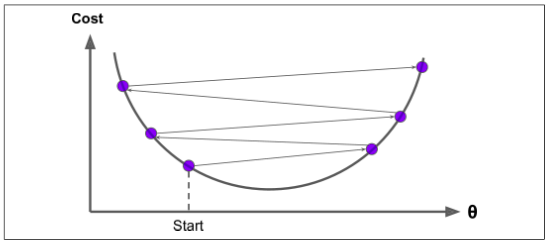
<center>
<img src="images/lecII/gd_big.png" alt="gd image small step">
</center>



# Batch Gradient Descent 
To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter θj.This is called a partial derivative.

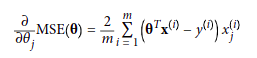

<center>
<img src="images/lecII/dmse.png" alt="partial derivation of MSEcost">
</center>

if you rewrite the equation in vector form ...

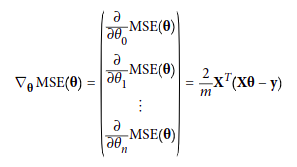

<center>
<img src="images/lecII/dmsevec.png" alt="partial derivation of MSEcost">
</center>

Once you have the gradient vector, which points uphill, just go in the opposite direc‐ tion to go downhill.

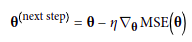
<center>
<img src="images/lecII/downhill.png" alt="partial derivation of MSEcost">
</center>












# Linear regression using batch gradient descent

In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
y_predict = X_new_b.dot(theta)

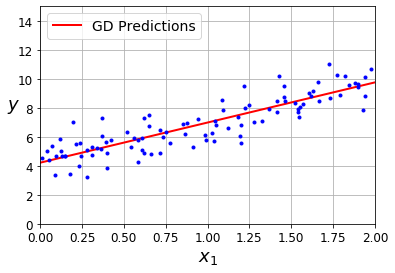

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="GD Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.grid()

## The Importance of Learning rate

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

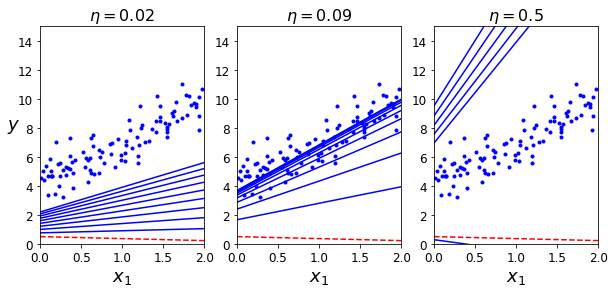

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.09, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

# Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent  just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration.

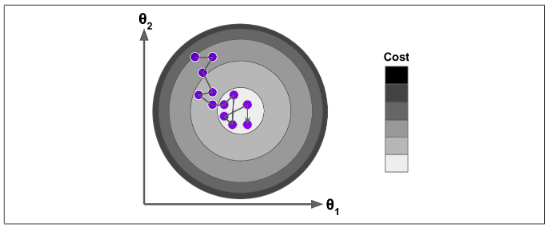

<center>
<img src="images/lecII/sgd.png" alt="SGD">
</center>


In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

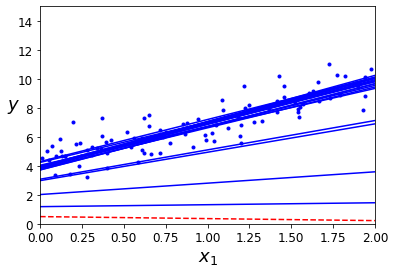

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                   
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                             
plt.show()                                        

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

## Using SGD Regressor in sklearn

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

# Mini-batch gradient descent

It is quite simple to understand once you know Batch and Stochastic Gradi‐ ent Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs. 

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.25214635],
       [2.7896408 ]])

## A rough comparision among GD variants

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

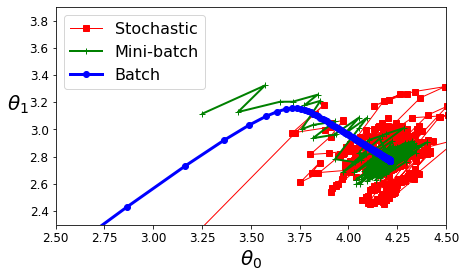

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Polynomial regression
Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression. 

In [ ]:
import numpy as np
import numpy.random as rnd
np.random.seed(42)

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

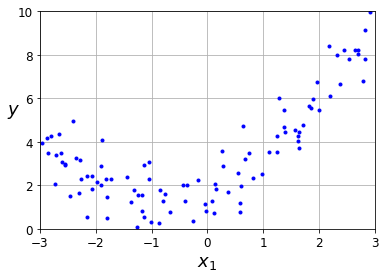

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly nomialFeatures  class to transform our training data, adding the square (2 nd -degree polynomial) of each feature in the training set as new features (in this case there is just one feature): 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

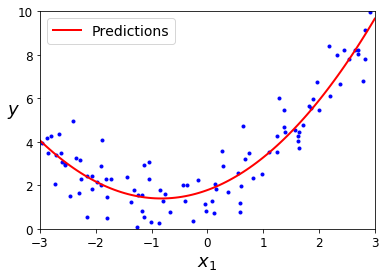

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Given the capability to perform non-linear regression using standard linear regressors, another hyper-patameter is added to the problem, the poly degree.

# bias-variance trade off 
If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. 

his high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model.

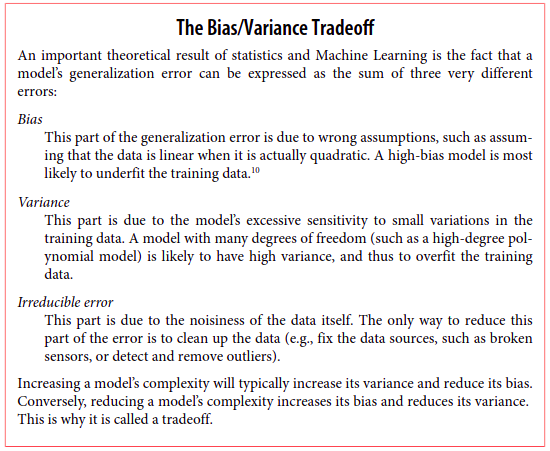

<center>
<img src="images/lecII/bias-variance.png" alt="SGD">
</center>

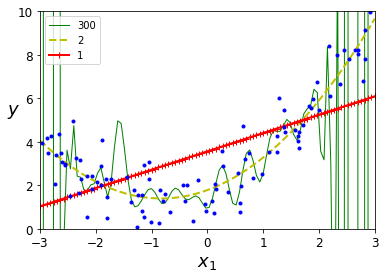

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("y--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration).
To generate the plots, simply train the model several times on different sized subsets of the training set.

## How to detect overfitness?

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14) 
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

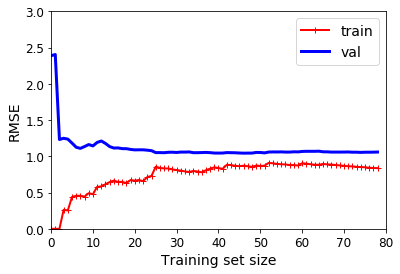

In [ ]:
lin_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=True)),
        ("lin_reg", LinearRegression()),
    ])
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                            
plt.show()                                      

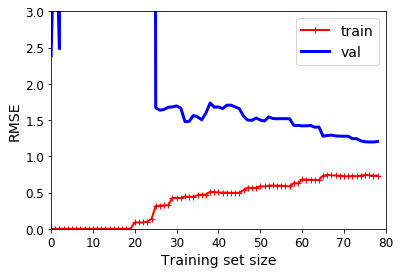

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                       